In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
import os

In [8]:
df_cleaned = pd.read_csv('../data/processed_data.csv')

In [9]:
ohe = OneHotEncoder()

cat_cols = ['Education', 'Living_With']
enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

In [10]:
enc_df = pd.DataFrame(enc_cols.toarray(), columns = ohe.get_feature_names_out(cat_cols), index = df_cleaned.index)

In [11]:
df_encoded = pd.concat([df_cleaned.drop(columns = cat_cols), enc_df], axis = 1)

In [12]:
df_encoded.shape

(2236, 18)

In [13]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


# Scaling

In [14]:
X = df_encoded

In [15]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Visualize 

In [16]:
X_scaled.shape

(2236, 18)

In [17]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)

In [18]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

Text(0.5, 0.92, '3D projection')

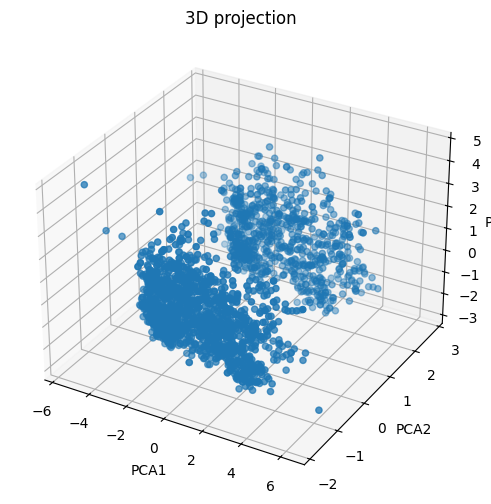

In [21]:
# plot
fig= plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D projection')

In [22]:
df_encoded.to_csv('../data/encoded_data.csv', index = False)

In [28]:
X_pca = pd.DataFrame(X_pca)

In [29]:
X_pca.to_csv('../data/final_data.csv', index=False)

In [32]:
model_path = 'models'
if not os.path.exists(model_path):
    os.makedirs(model_path)

In [33]:
joblib.dump(X_scaled, '../models/scaler.pkl')
print("Model saved successfully in the models/ folder!")

Model saved successfully in the models/ folder!
